In [1196]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1A
###    Task 1A: Reading and Inspection

####                     Subtask 1A.1: Import and read

               Import and read DATA contains GSDP of all the State and UTs.

In [1198]:
# Part 1A
# DATA contains GSDP of all the State and UTs for few year
DS_GSDP_All = pd.read_csv('ab40c054-5031-4376-b52e-9813e776f65e.csv')
DS_GSDP_All.shape

(11, 36)

### Subtask 1.2: 
    
####    Clean the data by Removing unwanted rows and cols. As we need to analysis the data only for 2013-14, 2014-15 and 2015-16  years. Drop the data for years 2011-12 ,2012-13, 2016-17. 
    
####   We can observe that West Bangal contain all the NaN values  so lets remove that row. 
    

In [1199]:
# Remove the rows using Row index for the year 2016-17
DS_GSDP_All.drop(DS_GSDP_All[DS_GSDP_All.Duration == '2016-17'].index, axis = 0, inplace = True)

# Remove the unnecessary rows using Row index for the year 2011-12, 2012-13
DS_GSDP_All.drop(DS_GSDP_All[DS_GSDP_All.Duration == '2011-12'].index, axis = 0, inplace = True)
DS_GSDP_All.drop(DS_GSDP_All[DS_GSDP_All.Duration == '2012-13'].index, axis = 0, inplace = True)

# Remove the column West Bengal As in contain all the NAN values
DS_GSDP_All.drop(['West Bengal1'], axis = 1, inplace = True)

In [1200]:
# Check if the rows has been dropped
DS_GSDP_All.shape

(6, 35)

In [1201]:
DS_GSDP_All

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,30304.00,551963.00,26533.00,13675331.00
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [1202]:
# Create a  DataFrame which contains only the % Growth over previous year
DS_GSDP_MEAN = DS_GSDP_All.loc[DS_GSDP_All['Items  Description'] == '(% Growth over previous year)']
DS_GSDP_MEAN

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [1203]:
# Drop the column as it is not required for analysis
DS_GSDP_MEAN.drop(columns = ['Items  Description'], axis = 1, inplace = True)
DS_GSDP_MEAN

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
7,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [1204]:
# Rename the Duration column as state 
DS_GSDP_MEAN = DS_GSDP_MEAN.rename(columns = {'Duration' : 'State'})

In [1205]:
DS_GSDP_MEAN

,State,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
7,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [1206]:
# Set the State Column as Index
DS_GSDP_MEAN.set_index('State', inplace = True)

In [1207]:
DS_GSDP_MEAN

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
State,,,,,,,,,,,,,,,,,,,,,
2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [1208]:
# Tanspose the dataframe
DS_GSDP_MEAN = DS_GSDP_MEAN.T

In [1209]:
DS_GSDP_MEAN

State,2013-14,2014-15,2015-16
Andhra Pradesh,12.85,13.40,15.85
Arunachal Pradesh,16.38,14.79,12.07
Assam,13.31,11.45,13.19
Bihar,12.30,17.92,10.59
Chhattisgarh,16.44,13.69,10.98
Goa,-5.77,13.12,10.75
Gujarat,11.47,10.82,11.09
Haryana,15.45,9.18,10.91
Himachal Pradesh,14.42,10.14,NaN
Jammu & Kashmir,10.09,4.70,17.91


### Subtask 1.3: Now we have clean dataset of % Growth over previous year  for all the states for the year 2013-14,	                            2014-15,	2015-16
             
####            Start processing the data and calculate the mean and add a new column 'Cal_Mean'

In [1210]:
# Calculate the mean value Along the axis 1 and add the new col
DS_GSDP_MEAN['Cal_Mean'] = DS_GSDP_MEAN.mean(axis = 1)

In [1211]:
DS_GSDP_MEAN

State,2013-14,2014-15,2015-16,Cal_Mean
Andhra Pradesh,12.85,13.40,15.85,14.033333
Arunachal Pradesh,16.38,14.79,12.07,14.413333
Assam,13.31,11.45,13.19,12.650000
Bihar,12.30,17.92,10.59,13.603333
Chhattisgarh,16.44,13.69,10.98,13.703333
Goa,-5.77,13.12,10.75,6.033333
Gujarat,11.47,10.82,11.09,11.126667
Haryana,15.45,9.18,10.91,11.846667
Himachal Pradesh,14.42,10.14,NaN,12.280000
Jammu & Kashmir,10.09,4.70,17.91,10.900000


In [1212]:
# Sort the Mean value in the Descending order
DS_GSDP_MEAN = DS_GSDP_MEAN.sort_values(by=['Cal_Mean'], ascending = False)

Subtask 1.4: Plot the average growth rates of the various states based on the mean value for 3 year(2013-2016)
    and Analysie the result

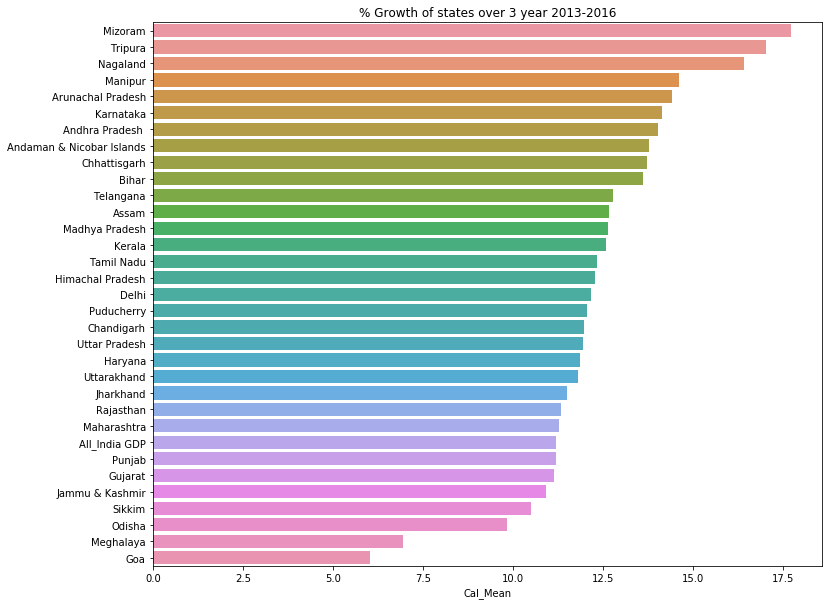

In [1213]:
# Below bar plot Report the average growth rates of the various states based on the mean value for 3 year(2013-2016)
plt.figure(figsize =(12,10))
sns.barplot(x=DS_GSDP_MEAN['Cal_Mean'], y=DS_GSDP_MEAN.index, data=DS_GSDP_MEAN)
plt.title("% Growth of states over 3 year 2013-2016")
plt.show()

### Subtask 1A.4: Analysis based on the above graph

#### Q 1 A 
 a) Which states have been growing consistently fast, and which ones have been struggling?
 
 Ans: As per the Above bar graph, 
     Mizoram is the state growing consistently fast over a period of 3 year and 
      Goa is the struggling state

 b) Curiosity exercise - what has been the average growth rate of your home state, and  
   how does it compare to the national average over this duration?
   
  Ans : My home state is Karnataka and Growth rate of Karnataka is more then the National Average represented by "All_India GDP'


In [1214]:
# Plot the total GDP of the states for the year 2015-16
# Make a new data frame with data only for 2015-16 
DS_GSDP_TOTAL = DS_GSDP_All.loc[(DS_GSDP_All['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)') & (DS_GSDP_All['Duration'] == '2015-16')]
DS_GSDP_TOTAL

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0,13675331.0


In [1215]:
# Drop the unwanted columns
DS_GSDP_TOTAL.drop(['Items  Description','All_India GDP'], axis = 1, inplace = True)

In [1216]:
# Set the Duration Column as Index and Transpose the data set
DS_GSDP_TOTAL.set_index('Duration', inplace = True)
DS_GSDP_TOTAL = DS_GSDP_TOTAL.T

In [1217]:
DS_GSDP_TOTAL

Duration,2015-16
Andhra Pradesh,609934.0
Arunachal Pradesh,18784.0
Assam,224234.0
Bihar,413503.0
Chhattisgarh,260776.0
Goa,45002.0
Gujarat,994316.0
Haryana,485184.0
Himachal Pradesh,NaN
Jammu & Kashmir,118387.0


In [1218]:
# Drop the Na values
DS_GSDP_TOTAL.dropna(how='all',inplace = True)

In [1219]:
# Sort the data set in Descending Order
DS_GSDP_TOTAL = DS_GSDP_TOTAL.sort_values(by=['2015-16'], ascending = False)
DS_GSDP_TOTAL

Duration,2015-16
Tamil Nadu,1212668.0
Uttar Pradesh,1153795.0
Karnataka,1027068.0
Gujarat,994316.0
Andhra Pradesh,609934.0
Kerala,588337.0
Telangana,575631.0
Delhi,551963.0
Madhya Pradesh,543975.0
Haryana,485184.0


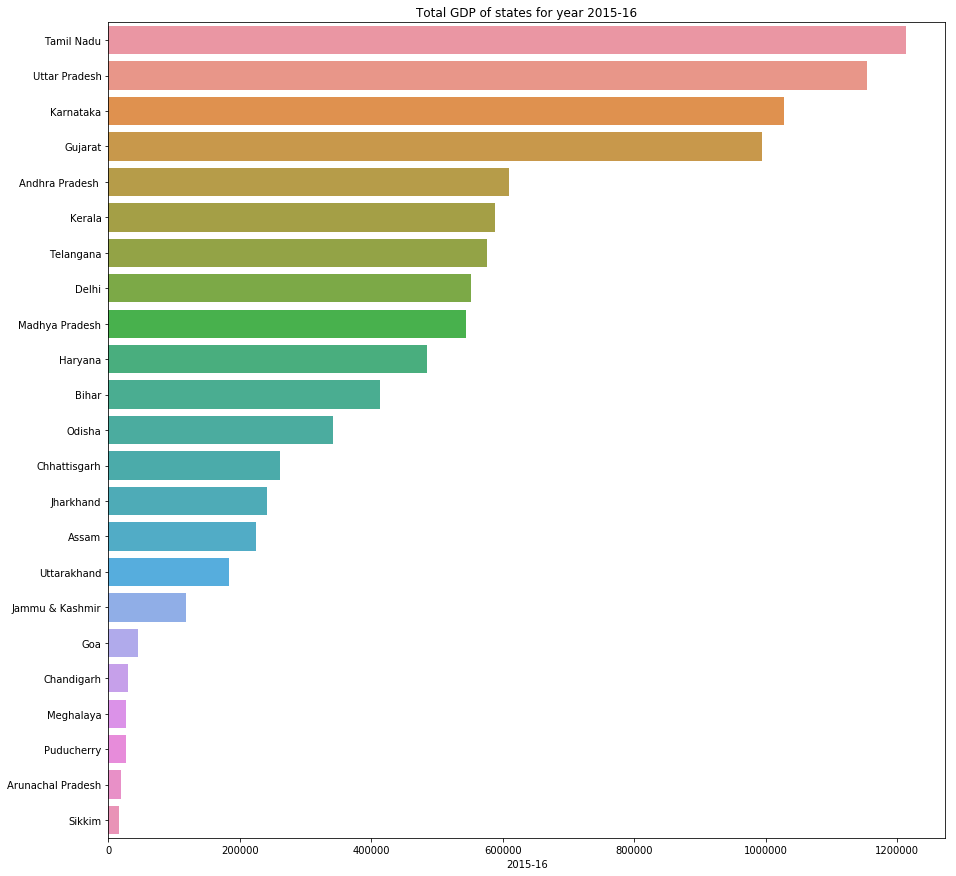

In [1220]:
# Plot the total GDP of the states for the year 2015-16
plt.figure(figsize =(15,15))
sns.barplot(x= DS_GSDP_TOTAL['2015-16'], y=DS_GSDP_TOTAL.index, data=DS_GSDP_TOTAL)
plt.title("Total GDP of states for year 2015-16")
plt.show()

 Subtask 1A.5: Analysis based on the above graph
 

 List of the top 5 state 
 
 1 Tamil Nadu	1212668.0
 
 2 Uttar Pradesh	1153795.0
 
 3 Karnataka	1027068.0
 
 4 Gujarat	994316.0
 
 5 Andhra Pradesh	609934.0
 


In [1221]:
# check the no. of rows
DS_GSDP_TOTAL.shape

(23, 1)

In [1222]:
# print the top 5 state
DS_GSDP_TOTAL.iloc[0:5,:]

Duration,2015-16
Tamil Nadu,1212668.0
Uttar Pradesh,1153795.0
Karnataka,1027068.0
Gujarat,994316.0
Andhra Pradesh,609934.0


###     Subtask 1.5: Analysis based on the above graph

####       List of the Bottom 5 state 

         1 Chandigarh	30304.0
 
         2 Meghalaya	26745.0
 
         3 Puducherry	26533.0
 
         4 Arunachal Pradesh	18784.0
 
         5 Sikkim	16637.0
 

In [1223]:
#print the bottom 5 state
DS_GSDP_TOTAL.iloc[18:23,:]

Duration,2015-16
Chandigarh,30304.0
Meghalaya,26745.0
Puducherry,26533.0
Arunachal Pradesh,18784.0
Sikkim,16637.0


#                       PART 1B
###  Task 1B : Reading and Inspection

    Subtask 1B.1: Import and read
  
          We need to perform the analysis only for the duration : 2014-15. 
        
          So collect the data by reading the data files and create Data Frame for each State.


In [1224]:

# Read All the data about 28 States as West Bengal Data is not available,
DS_AP = pd.read_csv("NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv")
DS_ARP = pd.read_csv('NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv')
DS_Assam = pd.read_csv('NAD-Assam-GSVA_cur_2015-16.csv')
DS_Bihar = pd.read_csv('NAD-Bihar-GSVA_cur_2015-16.csv')
DS_Chhattisgarh = pd.read_csv('NAD-Chhattisgarh-GSVA_cur_2016-17.csv')
DS_Goa = pd.read_csv('NAD-Goa-GSVA_cur_2015-16.csv')
DS_Gujarat = pd.read_csv('NAD-Gujarat-GSVA_cur_2015-16.csv')
DS_Haryana = pd.read_csv('NAD-Haryana-GSVA_cur_2016-17.csv')
DS_HP = pd.read_csv('NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv')
DS_Jharkhand = pd.read_csv('NAD-Jharkhand-GSVA_cur_2015-16.csv')
DS_Karnataka = pd.read_csv('NAD-Karnataka-GSVA_cur_2015-16.csv')
DS_Kerala = pd.read_csv('NAD-Kerala-GSVA_cur_2015-16.csv')
DS_MP = pd.read_csv('NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv')
DS_Maharashtra = pd.read_csv('NAD-Maharashtra-GSVA_cur_2014-15.csv')
DS_Meghalaya = pd.read_csv('NAD-Meghalaya-GSVA_cur_2016-17.csv')
DS_Mizoram = pd.read_csv('NAD-Mizoram-GSVA_cur_2014-15.csv')
DS_Nagaland = pd.read_csv('NAD-Nagaland-GSVA_cur_2014-15.csv')
DS_Odisha = pd.read_csv('NAD-Odisha-GSVA_cur_2016-17.csv')
DS_Punjab = pd.read_csv('NAD-Punjab-GSVA_cur_2014-15.csv')
DS_Rajasthan = pd.read_csv('NAD-Rajasthan-GSVA_cur_2014-15.csv')
DS_Sikkim = pd.read_csv('NAD-Sikkim-GSVA_cur_2015-16.csv')
DS_TN = pd.read_csv('NAD-Tamil_Nadu-GSVA_cur_2016-17.csv')
DS_Telangana = pd.read_csv('NAD-Telangana-GSVA_cur_2016-17.csv')
DS_Tripura = pd.read_csv('NAD-Tripura-GSVA_cur_2014-15.csv')
DS_UP = pd.read_csv('NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv')
DS_Uttarakhand = pd.read_csv('NAD-Uttarakhand-GSVA_cur_2015-16.csv')
DS_JK = pd.read_csv('NAD-Jammu_Kashmir-GSVA_cur_2015-16.csv')
DS_Manipur = pd.read_csv('NAD-Manipur-GSVA_cur_2014-15.csv', encoding='latin-1')
# 3 union territory
DS_Chandigarh = pd.read_csv('NAD-Chandigarh-GSVA_cur_2015-16.csv')
DS_Delhi = pd.read_csv('NAD-Delhi-GSVA_cur_2016-17.csv')
DS_Puducherry = pd.read_csv('NAD-Puducherry-GSVA_cur_2016-17.csv')


    
    
###    Subtask 1B.2: 
             Now the data has been read, Clean the data and keep only the required data
    
    

In [1225]:
# Raname the column '2014-15' with state name for all the state dataset so that it is easy to read the data
DS_AP = DS_AP.rename(columns = {"2014-15": "AP"})
DS_AP.drop(columns = ['2011-12','2012-13','2013-14','2015-16','2016-17'], axis = 1, inplace = True)

DS_ARP = DS_ARP.rename(columns = {"2014-15": "ARP"})
DS_ARP.drop(columns = ['2011-12','2012-13','2013-14','2015-16'], axis = 1, inplace = True)

DS_Assam = DS_Assam.rename(columns = {"2014-15": "Assam"})
DS_Assam.drop(columns = ['2011-12','2012-13','2013-14','2015-16'], axis = 1, inplace = True)

DS_Bihar = DS_Bihar.rename(columns = {"2014-15": "Bihar"})
DS_Bihar.drop(columns = ['2011-12','2012-13','2013-14','2015-16'], axis = 1, inplace = True)

DS_Chhattisgarh = DS_Chhattisgarh.rename(columns = {"2014-15": "Chhattisgarh"})
DS_Chhattisgarh.drop(columns = ['2011-12','2012-13','2013-14','2015-16','2016-17'], axis = 1, inplace = True)

DS_Goa = DS_Goa.rename(columns = {"2014-15": "Goa"})
DS_Goa.drop(columns = ['2011-12','2012-13','2013-14','2015-16'], axis = 1, inplace = True)

DS_Gujarat = DS_Gujarat.rename(columns = {"2014-15": "Gujarat"})
DS_Gujarat.drop(columns = ['2011-12','2012-13','2013-14','2015-16'], axis = 1, inplace = True)

DS_Haryana = DS_Haryana.rename(columns = {"2014-15": "Haryana"})
DS_Haryana.drop(columns = ['2011-12','2012-13','2013-14','2015-16','2016-17'], axis = 1, inplace = True)

DS_HP = DS_HP.rename(columns = {"2014-15": "HP"})
DS_HP.drop(columns = ['2011-12','2012-13','2013-14'], axis = 1, inplace = True)

DS_Jharkhand = DS_Jharkhand.rename(columns = {"2014-15": "Jharkhand"})
DS_Jharkhand.drop(columns = ['2011-12','2012-13','2013-14','2015-16'], axis = 1, inplace = True)

DS_Karnataka = DS_Karnataka.rename(columns = {"2014-15": "Karnataka"})
DS_Karnataka.drop(columns = ['2011-12','2012-13','2013-14','2015-16'], axis = 1, inplace = True)

DS_Kerala = DS_Kerala.rename(columns = {"2014-15": "Kerala"})
DS_Kerala.drop(columns = ['2011-12','2012-13','2013-14','2015-16'], axis = 1, inplace = True)

DS_MP = DS_MP.rename(columns = {"2014-15": "MP"})
DS_MP.drop(columns = ['2011-12','2012-13','2013-14','2015-16','2016-17'], axis = 1, inplace = True)

DS_Maharashtra = DS_Maharashtra.rename(columns = {"2014-15": "Maharashtra"})
DS_Maharashtra.drop(columns = ['2011-12','2012-13','2013-14'], axis = 1, inplace = True)

DS_Meghalaya = DS_Meghalaya.rename(columns = {"2014-15": "Meghalaya"})
DS_Meghalaya.drop(columns = ['2011-12','2012-13','2013-14','2015-16','2016-17'], axis = 1, inplace = True)

DS_Mizoram = DS_Mizoram.rename(columns = {"2014-15": "Mizoram"})
DS_Mizoram.drop(columns = ['2011-12','2012-13','2013-14'], axis = 1, inplace = True)

DS_Nagaland = DS_Nagaland.rename(columns = {"2014-15": "Nagaland"})
DS_Nagaland.drop(columns = ['2011-12','2012-13','2013-14'], axis = 1, inplace = True)

DS_Odisha = DS_Odisha.rename(columns = {"2014-15": "Odisha"})
DS_Odisha.drop(columns = ['2011-12','2012-13','2013-14','2015-16','2016-17'], axis = 1, inplace = True)

DS_Punjab = DS_Punjab.rename(columns = {"2014-15": "Punjab"})
DS_Punjab.drop(columns = ['2011-12','2012-13','2013-14'], axis = 1, inplace = True)

DS_Rajasthan = DS_Rajasthan.rename(columns = {"2014-15": "Rajasthan"})
DS_Rajasthan.drop(columns = ['2011-12','2012-13','2013-14'], axis = 1, inplace = True)

DS_Sikkim = DS_Sikkim.rename(columns = {"2014-15": "Sikkim"})
DS_Sikkim.drop(columns = ['2011-12','2012-13','2013-14','2015-16'], axis = 1, inplace = True)

DS_TN = DS_TN.rename(columns = {"2014-15": "TN"})
DS_TN.drop(columns = ['2011-12','2012-13','2013-14','2015-16','2016-17'], axis = 1, inplace = True)

DS_Telangana = DS_Telangana.rename(columns = {"2014-15": "Telangana"})
DS_Telangana.drop(columns = ['2011-12','2012-13','2013-14','2015-16','2016-17'], axis = 1, inplace = True)

DS_Tripura = DS_Tripura.rename(columns = {"2014-15": "Tripura"})
DS_Tripura.drop(columns = ['2011-12','2012-13','2013-14'], axis = 1, inplace = True)

DS_UP = DS_UP.rename(columns = {"2014-15": "UP"})
DS_UP.drop(columns = ['2011-12','2012-13','2013-14','2015-16'], axis = 1, inplace = True)

DS_Uttarakhand = DS_Uttarakhand.rename(columns = {"2014-15": "Uttarakhand"})
DS_Uttarakhand.drop(columns = ['2011-12','2012-13','2013-14','2015-16'], axis = 1, inplace = True)

DS_JK = DS_JK.rename(columns = {"2014-15": "JK"})
DS_JK.drop(columns = ['2011-12','2012-13','2013-14','2015-16'], axis = 1, inplace = True)

DS_Manipur = DS_Manipur.rename(columns = {"2014-15": "Manipur"})
DS_Manipur.drop(columns = ['2011-12','2012-13','2013-14'], axis = 1, inplace = True)

    
    
###    Subtask 1B.3: Merge all the state data set into one data frame for further analysis
    
        


In [1226]:
from functools import reduce

DS_LIST = [DS_AP,DS_ARP,DS_Assam,DS_Bihar,DS_Chhattisgarh,DS_Goa,DS_Gujarat,DS_Haryana,DS_HP,DS_Jharkhand,DS_Karnataka,DS_Kerala,DS_MP,DS_Maharashtra,DS_Meghalaya,DS_Mizoram,DS_Nagaland,DS_Odisha,DS_Punjab,DS_Rajasthan,DS_Sikkim,DS_TN,DS_Telangana,DS_Tripura,DS_UP,DS_Uttarakhand,DS_JK,DS_Manipur]

DS_JOIN = reduce(lambda x, y : pd.merge(x,y,how='left'),DS_LIST)
DS_JOIN

,S.No.,Item,AP,ARP,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Punjab,Rajasthan,Sikkim,TN,Telangana,Tripura,UP,Uttarakhand,JK,Manipur
0,1,"Agriculture, forestry and fishing",14819416,686117,3855548,7951890,3948847,308507,13769969.00,8015238.0,...,9285716,15044394,137447,13064238.0,7591501,799825.0,25097754,1601423.0,1586705,383140.0
1,1.1,Crops,7893514,415520,2890544,4688237,2613371,140421,9671086.00,4636731.0,...,5690972,7673441,114976,7297820.0,4162493,397591.0,16215212,866146.0,949424,226583.0
2,1.2,Livestock,4309078,38387,173478,2060296,352208,30141,2698910.00,2916173.0,...,2638842,5356257,17338,4693361.0,2951299,88176.0,7096876,391188.0,433133,75483.0
3,1.3,Forestry and logging,346160,224017,261987,550132,597785,15744,761616.00,352254.0,...,848245,1956660,4529,392705.0,210741,145096.0,1404936,339293.0,168093,45831.0
4,1.4,Fishing and aquaculture,2270664,8193,529539,653224,385483,122201,638357.00,110080.0,...,107657,58036,604,680352.0,266968,168961.0,380730,4796.0,36055,35243.0
5,2,Mining and quarrying,1484300,30842,1471149,68107,2451970,3622,2117218.00,25186.0,...,10354,4069385,1329,265536.0,1541853,142391.0,901501,244549.0,33621,NaN
6,Total,Primary,16303716,716959,5326697,8019997,6400817,312129,15887187.00,8040424.0,...,9296070,19113780,138776,13329774.0,9133354,942216.0,25999255,1845972.0,1620326,383140.0
7,3,Manufacturing,4672266,26120,2002936,2189965,4370593,1177608,24087538.00,7756921.0,...,4790341,6552580,550697,18914794.0,6353711,228625.0,12261649,5866252.0,893207,NaN
8,4,"Electricity, gas, water supply & other utility...",1151729,113527,296587,345168,1198438,204110,3409983.00,1101919.0,...,911611,1122888,212499,1710379.0,716266,77870.0,2030625,433880.0,597421,NaN
9,5,Construction,4664889,147842,1733568,3449763,2669855,165819,5526017.00,3702571.0,...,2202962,5353326,82058,12216718.0,2854024,177899.0,11256450,1342733.0,785503,NaN


In [1227]:
# Drop the column 'S.No.' as it is not required for futher analysis
DS_JOIN.drop(columns = ['S.No.'], axis = 1, inplace = True)

In [1228]:
# Set the item column as index 
DS_JOIN.set_index('Item', inplace = True)

# Transpose the dataframe so that its easy to analyse the data 
DS_JOIN = DS_JOIN.T

# Sort the Dataframe in the Descending order based on Per Capita GSDP  column
DS_JOIN = DS_JOIN.sort_values(by=['Per Capita GSDP (Rs.)'], ascending = False)

In [1229]:
DS_JOIN

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
Goa,308507.0,140421.0,30141.0,15744.0,122201.0,3622.0,312129.0,1177608.0,204110.0,165819.0,...,407099.0,346486.0,180431.0,1738217.0,3597882.0,527279.00,61854.0,4063307.0,14950.0,271793.0
Sikkim,137447.0,114976.0,17338.0,4529.0,604.0,1329.0,138776.0,550697.0,212499.0,82058.0,...,75330.0,119514.0,149265.0,483103.0,1467133.0,72200.00,18400.0,1520933.0,6330.0,240274.0
Haryana,8015238.0,4636731.0,2916173.0,352254.0,110080.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,...,6970183.0,1036377.0,2001581.0,19226568.0,39828404.0,4985670.00,1067867.0,43746207.0,266620.0,164077.0
Kerala,5930617.0,3070386.0,1656104.0,499808.0,704319.0,558824.0,6489442.0,4273567.0,482470.0,7314003.0,...,7287633.0,2068915.0,5728645.0,29673778.0,48233259.0,5189352.00,822381.0,52600230.0,339843.0,154778.0
Uttarakhand,1601423.0,866146.0,391188.0,339293.0,4796.0,244549.0,1845972.0,5866252.0,433880.0,1342733.0,...,831307.0,579409.0,982430.0,5587975.0,15076812.0,1434856.00,313139.0,16198529.0,105820.0,153076.0
Maharashtra,16475655.0,10435121.0,3972829.0,1592564.0,475141.0,5282727.0,21758383.0,33660294.0,4334702.0,9450211.0,...,30718051.0,5426991.0,10806363.0,88631076.0,157834665.0,25394800.00,4017300.0,179212165.0,1172450.0,152853.0
HP,1514981.0,853758.0,110304.0,540950.0,9968.0,33385.0,1548366.0,2543637.0,767268.0,808256.0,...,1125937.0,553974.0,923164.0,4133326.0,9800853.0,895317.00,259291.0,10436879.0,70840.0,147330.0
TN,13064238.0,7297820.0,4693361.0,392705.0,680352.0,265536.0,13329774.0,18914794.0,1710379.0,12216718.0,...,16830213.0,3400800.0,7430115.0,53343788.0,99515453.0,12507325.00,2766405.0,109256373.0,745760.0,146503.0
Karnataka,11219422.0,8157179.0,1868771.0,693082.0,500390.0,846882.0,12066304.0,12953843.0,1425762.0,6104799.0,...,24766393.0,2232584.0,5308174.0,50490630.0,83041338.0,11026674.00,1889206.0,92178806.0,635100.0,145141.0
Gujarat,13769969.0,9671086.0,2698910.0,761616.0,638357.0,2117218.0,15887187.0,24087538.0,3409983.0,5526017.0,...,5179502.0,2576195.0,3123413.0,30220377.0,79131102.0,12353171.04,1981546.0,89502727.0,633590.0,141263.0


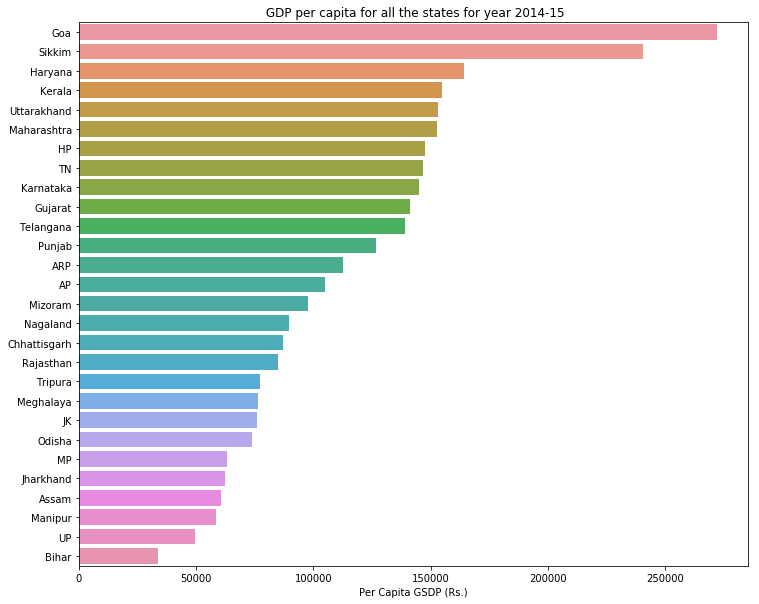

In [1230]:
#Plot the GDP per capita for all the states using Bar graph
plt.figure(figsize =(12,10))
sns.barplot(x= DS_JOIN['Per Capita GSDP (Rs.)'], y=DS_JOIN.index, data=DS_JOIN)
plt.title(" GDP per capita for all the states for year 2014-15")
plt.show()

       
###       Subtask 1B.3.1 : 
                   Analyse the Above Bar plot to answer the below Question from Assignment
                    
                   Identify the top-5 and the bottom-5 states based on GDP per capita. 
                       

In [1231]:
# Check the total number of entries and extract the Top 5 and Bottom 5. 
DS_JOIN.shape

(28, 33)

In [1232]:
# Print the top 5 state 
DS_JOIN.iloc[0:5,32:33]

Item,Per Capita GSDP (Rs.)
Goa,271793.0
Sikkim,240274.0
Haryana,164077.0
Kerala,154778.0
Uttarakhand,153076.0


In [1233]:
# Print the bottom 5 state 
DS_JOIN.iloc[23:28,32:33]

Item,Per Capita GSDP (Rs.)
Jharkhand,62091.0
Assam,60621.0
Manipur,58442.0
UP,49450.0
Bihar,33954.0


    
###    Subtask 1B.3.2 : Find the ratio of highest per capita GDP to the lowest per capita GDP as per Assignment
        

In [1234]:
Ratio_per_capita_GDP = round(DS_JOIN['Per Capita GSDP (Rs.)'].max()/DS_JOIN['Per Capita GSDP (Rs.)'].min(),2)
Ratio_per_capita_GDP

8.0

    
###    Subtask 1B.4   
###                  Plot the percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states.
                   

In [1235]:
# Create 3 new columns Primary_%Contribution, Secondary_%Contribution, Tertiary_%Contribution  
# for primary secondary and tertiary sector in the DS_JOIN dataframe for their % Contribution to GSDP

DS_JOIN.loc[:,'Primary_%Contribution'] = round(100*(DS_JOIN['Primary']/DS_JOIN['Gross State Domestic Product']),2)
DS_JOIN.loc[:,'Secondary_%Contribution'] = round(100*(DS_JOIN['Secondary']/DS_JOIN['Gross State Domestic Product']),2)
DS_JOIN.loc[:,'Tertiary_%Contribution'] = round(100*(DS_JOIN['Tertiary']/DS_JOIN['Gross State Domestic Product']),2)

DS_JOIN.head()

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Primary_%Contribution,Secondary_%Contribution,Tertiary_%Contribution
Goa,308507.0,140421.0,30141.0,15744.0,122201.0,3622.0,312129.0,1177608.0,204110.0,165819.0,...,1738217.0,3597882.0,527279.0,61854.0,4063307.0,14950.0,271793.0,7.68,38.09,42.78
Sikkim,137447.0,114976.0,17338.0,4529.0,604.0,1329.0,138776.0,550697.0,212499.0,82058.0,...,483103.0,1467133.0,72200.0,18400.0,1520933.0,6330.0,240274.0,9.12,55.57,31.76
Haryana,8015238.0,4636731.0,2916173.0,352254.0,110080.0,25186.0,8040424.0,7756921.0,1101919.0,3702571.0,...,19226568.0,39828404.0,4985670.0,1067867.0,43746207.0,266620.0,164077.0,18.38,28.71,43.95
Kerala,5930617.0,3070386.0,1656104.0,499808.0,704319.0,558824.0,6489442.0,4273567.0,482470.0,7314003.0,...,29673778.0,48233259.0,5189352.0,822381.0,52600230.0,339843.0,154778.0,12.34,22.95,56.41
Uttarakhand,1601423.0,866146.0,391188.0,339293.0,4796.0,244549.0,1845972.0,5866252.0,433880.0,1342733.0,...,5587975.0,15076812.0,1434856.0,313139.0,16198529.0,105820.0,153076.0,11.40,47.18,34.50


###    Subtask 1B.4.1  Plot the percentage contribution of primary, secondary and tertiary sectors 
###                   as a percentage of total GDP for all the states

In [1236]:
# Create a new data frame and select the primary , secondry and tertiary % contirbution columns
GSDP_DF = DS_JOIN.loc[:, ['Primary_%Contribution','Secondary_%Contribution','Tertiary_%Contribution']]

# Chk if DF has been created sucessfully
GSDP_DF.shape

(28, 3)

In [1237]:
# Creating a DF Which is required for analysis in Part 2 of assignment
# select the column Per Capita GSDP from DS_JOIN df
DS_GDP = DS_JOIN.loc[:, ['Per Capita GSDP (Rs.)']]

# Chk if DF has been created sucessfully
DS_GDP.shape

(28, 1)

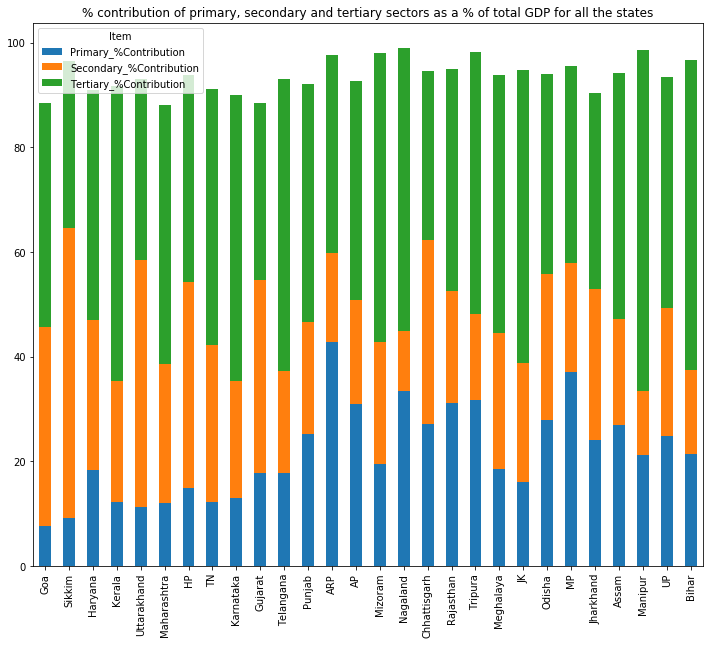

In [1238]:
# Plot a Stack graph to Analysis the primary , secondary , tertiary sector % contribution
GSDP_DF.plot(kind ='bar', stacked = True, figsize =(12,10), title = '% contribution of primary, secondary and tertiary sectors as a % of total GDP for all the states')

    
###        Subtask 1B.5.1
####        Categorise the states into four categories based on GDP per capita (C1, C2, C3, C4 - C1 
####        would have the highest per capita GDP, C4 the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e. 
####        the states lying between the 85th and the 100th percentile are in C1, those between 50th and 85th 
####        percentile are in C2 and so on.

In [1239]:
# ARRANGE THE DATA FRAME IN ASCENDING ORDER BASED OF GDP_per_capita
DS_JOIN = DS_JOIN.sort_values(by=['Per Capita GSDP (Rs.)'], ascending = False)

# Create a new column based for categories C1, C2, C3, C4 Calculated based on Quantile values of Per Capita GSDP
DS_JOIN.loc[:,'Quantile_GSDP_per_capita'] = pd.qcut(DS_JOIN['Per Capita GSDP (Rs.)'], [0,0.20,0.5, 0.85, 1], labels=['C4','C3','C2','C1'])

# Drop the unnecessary Columns
DS_JOIN.drop(columns = ['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products','Primary_%Contribution','Secondary_%Contribution','Tertiary_%Contribution',"Population ('00)",'Per Capita GSDP (Rs.)'], axis = 1, inplace = True)


In [1240]:
# Calculuate the total value of each sector per category
DS_JOIN_CATEGORY = DS_JOIN.groupby(['Quantile_GSDP_per_capita']).sum()
DS_JOIN_CATEGORY

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants",...,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
Quantile_GSDP_per_capita,,,,,,,,,,,,,,,,,,,,,
C4,56735044.0,39331055.0,11901405.0,3673623.0,1828960.0,6096419.0,24937531.0,4282774.0,22632766.0,27221645.0,...,7411.0,116154.0,275233.0,221940.0,4462395.0,7654183.0,24018199.0,13189552.0,15541085.0,233252066.0
C3,28994177.0,16732227.0,7259849.0,3867828.0,1134272.0,9385092.0,18259272.0,4050466.0,11828535.0,13901840.0,...,51280.0,78992.0,171175.0,56695.0,2315750.0,4239374.0,13158791.0,7076156.0,9546854.0,135359991.0
C2,88427015.0,54577463.0,23281781.0,5610080.0,4957690.0,11613097.0,108002544.0,14541227.0,43975718.0,63729156.0,...,412392.0,670852.0,2515438.0,386555.0,9603839.0,37812475.0,95695548.0,20189303.0,39486616.0,622828765.0
C1,15993232.0,8828660.0,5010944.0,1211628.0,942000.0,833510.0,19625045.0,2434878.0,12607184.0,15738265.0,...,44776.0,175277.0,281032.0,18766.0,2154295.0,4321519.0,15571552.0,4150701.0,9042352.0,118129206.0


In [1241]:
# Copy the DS_JOIN_CATEGORY into a new dataframe required for future calculation
DS_SECTORS = DS_JOIN_CATEGORY

In [1242]:
# Transpose the table for further analysis
DS_JOIN_CATEGORY = DS_JOIN_CATEGORY.T
DS_JOIN_CATEGORY

Quantile_GSDP_per_capita,C4,C3,C2,C1
Item,,,,
"Agriculture, forestry and fishing",56735044.0,28994177.0,88427015.0,15993232.0
Crops,39331055.0,16732227.0,54577463.0,8828660.0
Livestock,11901405.0,7259849.0,23281781.0,5010944.0
Forestry and logging,3673623.0,3867828.0,5610080.0,1211628.0
Fishing and aquaculture,1828960.0,1134272.0,4957690.0,942000.0
Mining and quarrying,6096419.0,9385092.0,11613097.0,833510.0
Manufacturing,24937531.0,18259272.0,108002544.0,19625045.0
"Electricity, gas, water supply & other utility services",4282774.0,4050466.0,14541227.0,2434878.0
Construction,22632766.0,11828535.0,43975718.0,12607184.0


###  Subtask 1B.5.2.1
###       Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc.) [not primary, secondary and tertiary] which contribute to approx. 80% of the GSDP of each category

In [1243]:
DS_SECTORS

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants",...,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
Quantile_GSDP_per_capita,,,,,,,,,,,,,,,,,,,,,
C4,56735044.0,39331055.0,11901405.0,3673623.0,1828960.0,6096419.0,24937531.0,4282774.0,22632766.0,27221645.0,...,7411.0,116154.0,275233.0,221940.0,4462395.0,7654183.0,24018199.0,13189552.0,15541085.0,233252066.0
C3,28994177.0,16732227.0,7259849.0,3867828.0,1134272.0,9385092.0,18259272.0,4050466.0,11828535.0,13901840.0,...,51280.0,78992.0,171175.0,56695.0,2315750.0,4239374.0,13158791.0,7076156.0,9546854.0,135359991.0
C2,88427015.0,54577463.0,23281781.0,5610080.0,4957690.0,11613097.0,108002544.0,14541227.0,43975718.0,63729156.0,...,412392.0,670852.0,2515438.0,386555.0,9603839.0,37812475.0,95695548.0,20189303.0,39486616.0,622828765.0
C1,15993232.0,8828660.0,5010944.0,1211628.0,942000.0,833510.0,19625045.0,2434878.0,12607184.0,15738265.0,...,44776.0,175277.0,281032.0,18766.0,2154295.0,4321519.0,15571552.0,4150701.0,9042352.0,118129206.0


In [1244]:
DS_SECTORS.drop(columns = ['Gross State Domestic Product'],axis = 1,inplace = True)

In [1245]:
DS_SECTORS = DS_SECTORS.T
DS_SECTORS

Quantile_GSDP_per_capita,C4,C3,C2,C1
Item,,,,
"Agriculture, forestry and fishing",56735044.0,28994177.0,88427015.0,15993232.0
Crops,39331055.0,16732227.0,54577463.0,8828660.0
Livestock,11901405.0,7259849.0,23281781.0,5010944.0
Forestry and logging,3673623.0,3867828.0,5610080.0,1211628.0
Fishing and aquaculture,1828960.0,1134272.0,4957690.0,942000.0
Mining and quarrying,6096419.0,9385092.0,11613097.0,833510.0
Manufacturing,24937531.0,18259272.0,108002544.0,19625045.0
"Electricity, gas, water supply & other utility services",4282774.0,4050466.0,14541227.0,2434878.0
Construction,22632766.0,11828535.0,43975718.0,12607184.0


In [1246]:
# Calculate Category wise Cumulative Sum of all the Sectors 

DS_SECTORS = DS_SECTORS.sort_values(by=['C1'], ascending = False)
DS_C1_SECTORS = 100*DS_SECTORS.C1.cumsum()/DS_SECTORS.C1.sum()

DS_SECTORS = DS_SECTORS.sort_values(by=['C2'], ascending = False)
DS_C2_SECTORS = 100*DS_SECTORS.C2.cumsum()/DS_SECTORS.C2.sum()

DS_SECTORS = DS_SECTORS.sort_values(by=['C3'], ascending = False)
DS_C3_SECTORS = 100*DS_SECTORS.C3.cumsum()/DS_SECTORS.C3.sum()

DS_SECTORS = DS_SECTORS.sort_values(by=['C4'], ascending = False)
DS_C4_SECTORS = 100*DS_SECTORS.C4.cumsum()/DS_SECTORS.C4.sum()

# List of the Float datatype, convert into dataframe
data  = [DS_C1_SECTORS,DS_C2_SECTORS,DS_C3_SECTORS,DS_C4_SECTORS]
DS_SECTORS_ALL = pd.DataFrame(data)
DS_SECTORS_ALL

,Manufacturing,"Agriculture, forestry and fishing","Trade, repair, hotels and restaurants","Real estate, ownership of dwelling & professional services",Construction,Other services,Crops,"Transport, storage, communication & services related to broadcasting",Trade & repair services,Livestock,...,Road transport,Hotels & restaurants,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Railways,Services incidental to transport,Air transport,Water transport,Storage
C1,14.326124,26.001054,37.489860,48.856967,58.060110,64.660954,71.105804,76.861975,81.796700,85.454649,...,96.109035,96.995570,97.880049,98.567701,99.176157,99.620513,99.825664,99.953615,99.986301,100.000000
C2,14.447718,39.078165,47.603343,27.249105,68.470097,73.752302,62.587377,83.861797,55.286440,86.976248,...,92.040095,97.665617,98.416089,99.079289,95.538812,99.466887,99.803382,99.893123,99.948290,100.000000
C3,26.401236,16.199497,43.516966,50.868987,64.766162,70.100138,35.749792,79.739179,58.157376,83.795369,...,92.419833,99.799900,96.843907,98.771488,75.343735,99.321115,99.895539,99.939673,100.000000,99.971349
C4,54.518519,17.796287,38.672113,62.052394,69.151696,79.071046,30.133401,74.196218,46.696273,86.941418,...,89.389189,99.231594,97.597837,99.805291,93.702390,98.634562,99.891624,99.997675,100.000000,99.961241


In [1247]:
DS_SECTORS_ALL = DS_SECTORS_ALL.T
DS_SECTORS_ALL

,C1,C2,C3,C4
Manufacturing,14.326124,14.447718,26.401236,54.518519
"Agriculture, forestry and fishing",26.001054,39.078165,16.199497,17.796287
"Trade, repair, hotels and restaurants",37.489860,47.603343,43.516966,38.672113
"Real estate, ownership of dwelling & professional services",48.856967,27.249105,50.868987,62.052394
Construction,58.060110,68.470097,64.766162,69.151696
Other services,64.660954,73.752302,70.100138,79.071046
Crops,71.105804,62.587377,35.749792,30.133401
"Transport, storage, communication & services related to broadcasting",76.861975,83.861797,79.739179,74.196218
Trade & repair services,81.796700,55.286440,58.157376,46.696273
Livestock,85.454649,86.976248,83.795369,86.941418


    
### Subtask 1B.5.2.1a Print the list of sectors which contibute to nearly 80% for each Category

    
        
    

In [1248]:
# Sort the data based on C1 in increasing order as it is a Cumulative value
DS_SECTORS_ALL = DS_SECTORS_ALL.sort_values(by=['C1'], ascending = True)

#Print the list of sectors which contibute to nearly 80% for C1 Category
DS_SECTORS_ALL.loc[DS_SECTORS_ALL[DS_SECTORS_ALL['C1'] <= 80 ].index,'C1']

Manufacturing                                                           14.326124
Agriculture, forestry and fishing                                       26.001054
Trade, repair, hotels and restaurants                                   37.489860
Real estate, ownership of dwelling & professional services              48.856967
Construction                                                            58.060110
Other services                                                          64.660954
Crops                                                                   71.105804
Transport, storage, communication & services related to broadcasting    76.861975
Name: C1, dtype: float64

In [1249]:
# Sort the data based on C1 in increasing order as it is a Cumulative value
DS_SECTORS_ALL = DS_SECTORS_ALL.sort_values(by=['C2'], ascending = True)

#Print the list of sectors which contibute to nearly 80% for C2 Category
DS_SECTORS_ALL.loc[DS_SECTORS_ALL[DS_SECTORS_ALL['C2'] <= 80 ].index,'C2']

Manufacturing                                                 14.447718
Real estate, ownership of dwelling & professional services    27.249105
Agriculture, forestry and fishing                             39.078165
Trade, repair, hotels and restaurants                         47.603343
Trade & repair services                                       55.286440
Crops                                                         62.587377
Construction                                                  68.470097
Other services                                                73.752302
Financial services                                            78.810553
Name: C2, dtype: float64

In [1250]:
# Sort the data based on C1 in increasing order as it is a Cumulative value
DS_SECTORS_ALL = DS_SECTORS_ALL.sort_values(by=['C3'], ascending = True)

#Print the list of sectors which contibute to nearly 80% for C3 Category
DS_SECTORS_ALL.loc[DS_SECTORS_ALL[DS_SECTORS_ALL['C3'] <= 80 ].index,'C3']

Agriculture, forestry and fishing                                       16.199497
Manufacturing                                                           26.401236
Crops                                                                   35.749792
Trade, repair, hotels and restaurants                                   43.516966
Real estate, ownership of dwelling & professional services              50.868987
Trade & repair services                                                 58.157376
Construction                                                            64.766162
Other services                                                          70.100138
Mining and quarrying                                                    75.343735
Transport, storage, communication & services related to broadcasting    79.739179
Name: C3, dtype: float64

In [1251]:
# Sort the data based on C1 in increasing order as it is a Cumulative value
DS_SECTORS_ALL = DS_SECTORS_ALL.sort_values(by=['C4'], ascending = True)

#Print the list of sectors which contibute to nearly 80% for C4 Category
DS_SECTORS_ALL.loc[DS_SECTORS_ALL[DS_SECTORS_ALL['C4'] <= 80 ].index,'C4']

Agriculture, forestry and fishing                                       17.796287
Crops                                                                   30.133401
Trade, repair, hotels and restaurants                                   38.672113
Trade & repair services                                                 46.696273
Manufacturing                                                           54.518519
Real estate, ownership of dwelling & professional services              62.052394
Construction                                                            69.151696
Transport, storage, communication & services related to broadcasting    74.196218
Other services                                                          79.071046
Name: C4, dtype: float64

### Subtask 1B.5.2.2
###                Plot the contribution of the sub-sectors as a percentage of the GSDP of each category C1, C2, C3, C4


In [1252]:
# Calculate percentage contibution of each category in GSDP

# As the DS_JOIN_CATEGORY is a dataframe of type Categorical,
# we can't add a new column to it so create a new data frame for the result
DS_C1_GSDPofSubSector = round(100*(DS_JOIN_CATEGORY['C1']/DS_JOIN_CATEGORY.loc['Gross State Domestic Product','C1']),2)
DS_C2_GSDPofSubSector = round(100*(DS_JOIN_CATEGORY['C2']/DS_JOIN_CATEGORY.loc['Gross State Domestic Product','C2']),2)
DS_C3_GSDPofSubSector = round(100*(DS_JOIN_CATEGORY['C3']/DS_JOIN_CATEGORY.loc['Gross State Domestic Product','C3']),2)
DS_C4_GSDPofSubSector = round(100*(DS_JOIN_CATEGORY['C4']/DS_JOIN_CATEGORY.loc['Gross State Domestic Product','C4']),2)

# List of the Float datatype, convert into dataframe
data  = [DS_C1_GSDPofSubSector,DS_C2_GSDPofSubSector,DS_C3_GSDPofSubSector,DS_C4_GSDPofSubSector]
DS_ALL = pd.DataFrame(data)

DS_ALL

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants",...,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
C1,13.54,7.47,4.24,1.03,0.80,0.71,16.61,2.06,10.67,13.32,...,0.04,0.15,0.24,0.02,1.82,3.66,13.18,3.51,7.65,100.0
C2,14.20,8.76,3.74,0.90,0.80,1.86,17.34,2.33,7.06,10.23,...,0.07,0.11,0.40,0.06,1.54,6.07,15.36,3.24,6.34,100.0
C3,21.42,12.36,5.36,2.86,0.84,6.93,13.49,2.99,8.74,10.27,...,0.04,0.06,0.13,0.04,1.71,3.13,9.72,5.23,7.05,100.0
C4,24.32,16.86,5.10,1.57,0.78,2.61,10.69,1.84,9.70,11.67,...,0.00,0.05,0.12,0.10,1.91,3.28,10.30,5.65,6.66,100.0


In [1253]:
# lets drop the column, Gross State Domestic Product, not required for further analysis
DS_ALL.drop(columns = ['Gross State Domestic Product'], axis =1,inplace = True)

In [1254]:
# Transpose the dataframe 
DS_ALL = DS_ALL.T

DS_ALL

,C1,C2,C3,C4
Item,,,,
"Agriculture, forestry and fishing",13.54,14.20,21.42,24.32
Crops,7.47,8.76,12.36,16.86
Livestock,4.24,3.74,5.36,5.10
Forestry and logging,1.03,0.90,2.86,1.57
Fishing and aquaculture,0.80,0.80,0.84,0.78
Mining and quarrying,0.71,1.86,6.93,2.61
Manufacturing,16.61,17.34,13.49,10.69
"Electricity, gas, water supply & other utility services",2.06,2.33,2.99,1.84
Construction,10.67,7.06,8.74,9.70


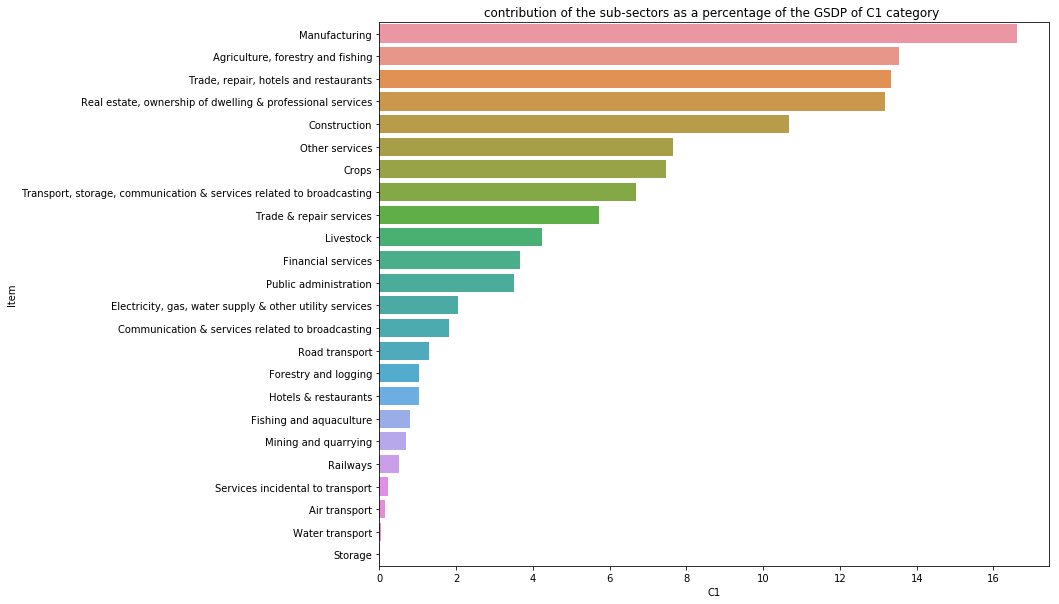

In [1255]:
#Plot the contribution of the sub-sectors as a percentage of the GSDP of C1 category
# Sort the data for Category C1
DS_ALL = DS_ALL.sort_values(by=['C1'], ascending = False)
plt.figure(figsize =(12,10))
sns.barplot(x= DS_ALL['C1'], y=DS_ALL.index, data=DS_ALL)
plt.title("contribution of the sub-sectors as a percentage of the GSDP of C1 category ")
plt.show()

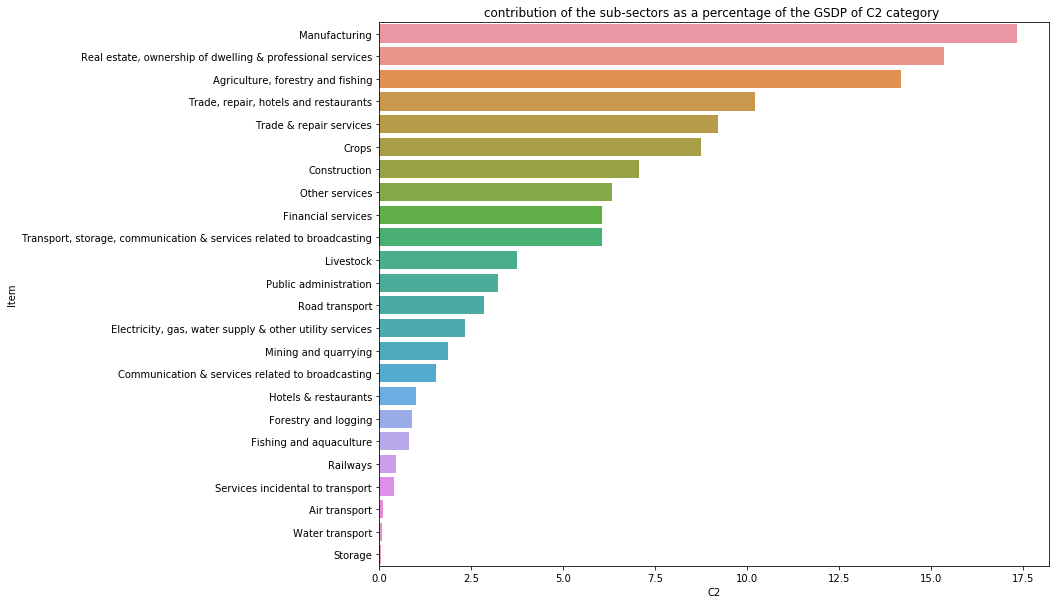

In [1256]:
#Plot the contribution of the sub-sectors as a percentage of the GSDP of C1 category
# Sort the data for Category C1
DS_ALL = DS_ALL.sort_values(by=['C2'], ascending = False)
plt.figure(figsize =(12,10))
sns.barplot(x= DS_ALL['C2'], y=DS_ALL.index, data=DS_ALL)
plt.title("contribution of the sub-sectors as a percentage of the GSDP of C2 category ")
plt.show()

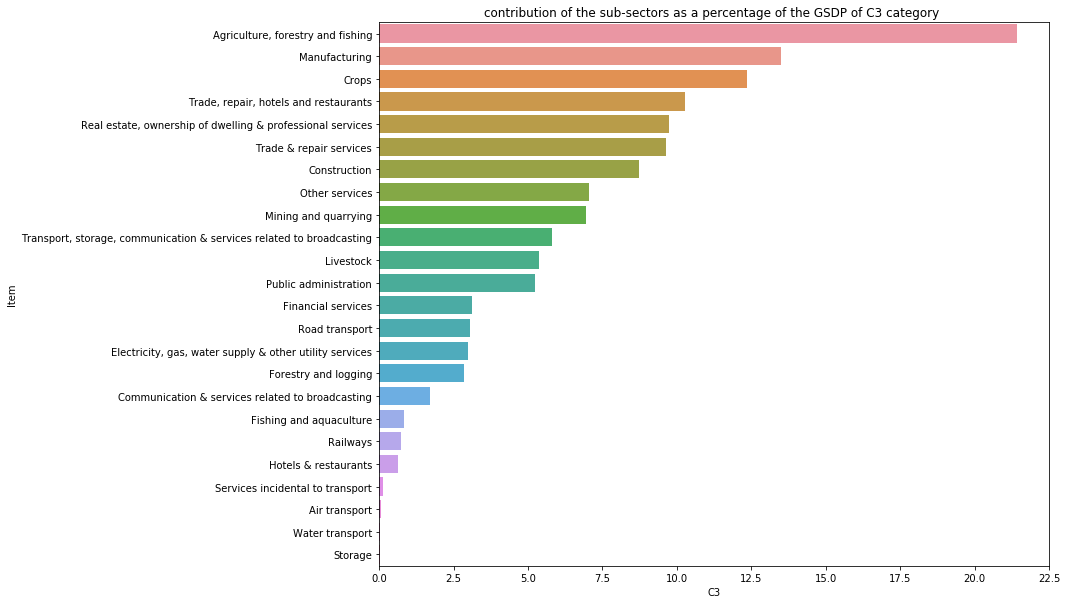

In [1257]:
#Plot the contribution of the sub-sectors as a percentage of the GSDP of C1 category
# Sort the data for Category C3
DS_ALL = DS_ALL.sort_values(by=['C3'], ascending = False)
plt.figure(figsize =(12,10))
sns.barplot(x= DS_ALL['C3'], y=DS_ALL.index, data=DS_ALL)
plt.title("contribution of the sub-sectors as a percentage of the GSDP of C3 category ")
plt.show()


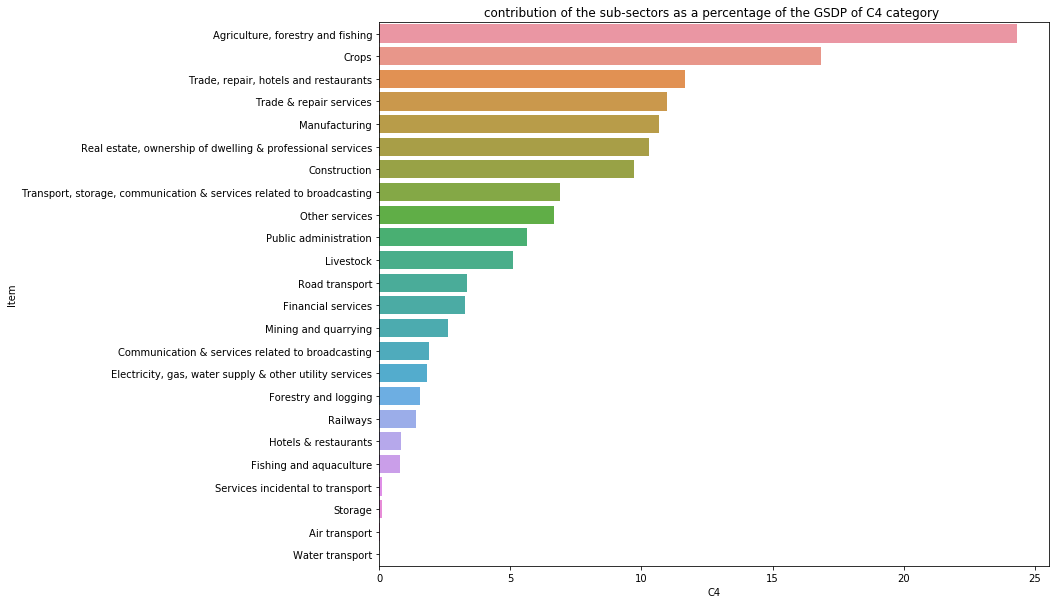

In [1258]:
#Plot the contribution of the sub-sectors as a percentage of the GSDP of C1 category
# Sort the data for Category C1
DS_ALL = DS_ALL.sort_values(by=['C4'], ascending = False)
plt.figure(figsize =(12,10))
sns.barplot(x= DS_ALL['C4'], y=DS_ALL.index, data=DS_ALL)
plt.title("contribution of the sub-sectors as a percentage of the GSDP of C4 category ")
plt.show()

### Part 1B - Final Analysis
###    Now that the data has been summarised in the form of plots, tables etc., 
###    lets try to observe non-obvious insights from it and answer the below Questions from Assignment

### 1. How does the GDP distribution of the top states (C1) differ from the others?
####    Ans : GDP distribution of the top states (C1) are in Secondary and tertiary sectors mainly Manufacturing,
####        Services Sector where as GDP distribution of C3 , C4 are in primary sectors like Agriculture, forestry and fishing and CROPS
         

###  2. Which sub-sectors seem to be correlated with high GDP?
####      Ans : From the above data it is clear that  
####            Secondary and Tertiary sectors, like manufacturing and services industries, Real estate, etc are contributing to the high GDP, 


### 3. Which sub-sectors do the various categories need to focus on? 
####     Ans : shifting the distribution of GDP towards the secondary and tertiary sectors may increase per capita GDP 

### 4. Finally, provide at least two recommendations for each category to improve the per capita GDP
####     Ans : 
####        Category C1 - As Manufacturing and Service sectors are doing good, it can focus more on Real estate,Agriculture 
####        Category C2 - As Manufacturing and Real estate are doing good , it can focus more on Service sectors,Construction,Agriculture
####        Category C3 - As Agriculture is doing good,it can focus more on  Manufacturing, Service sectors,Real estate
####        Category C4 - As Agriculture is doing good,it can focus more on  Manufacturing, Service sectors,Real estate
  


    
    

##              Part-II:     GDP and Education Drop-out Rates
    
        
        

In [1259]:
# Read the data file, Clean up the data and make the data set ready for analysis
DS_DROP_RATE = pd.read_csv('rs_session243_au570_1.1.csv')
DS_DROP_RATE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
Sl. No.                         37 non-null object
Level of Education - State      37 non-null object
Primary - 2012-2013             29 non-null float64
Primary - 2014-2015             33 non-null float64
Primary - 2014-2015.1           31 non-null float64
Upper Primary - 2012-2013       31 non-null float64
Upper Primary - 2013-2014       35 non-null float64
Upper Primary - 2014-2015       35 non-null float64
Secondary - 2012-2013           34 non-null float64
Secondary - 2013-2014           36 non-null float64
Secondary - 2014-2015           36 non-null float64
Senior Secondary - 2012-2013    24 non-null float64
Senior Secondary - 2013-2014    27 non-null float64
Senior Secondary - 2014-2015    28 non-null float64
dtypes: float64(12), object(2)
memory usage: 4.1+ KB


In [1260]:
# Select only the columns which are required primary , secondary, tertiary for the year 2014-15

# Assumption: As there were 2 columns with same name Primary - 2014-2015, Primary - 2014-2015.1, I have used Primary - 2014-2015.1 for calculation
# considering that Primary - 2014-2015 shouls be for the year 2013-14 which is missing in original data set
DS_DROP_RATE = DS_DROP_RATE.loc[:,('Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015','Senior Secondary - 2014-2015')]
DS_DROP_RATE

,Level of Education - State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
0,A & N Islands,0.51,1.69,9.870,16.93
1,Andhra Pradesh,6.72,5.20,15.710,NaN
2,Arunachal Pradesh,10.82,6.71,17.110,18.42
3,Assam,15.36,10.51,27.060,NaN
4,Bihar,NaN,4.08,25.900,NaN
5,Chandigarh,NaN,0.44,NaN,10.55
6,Chhatisgarh,2.91,5.85,21.260,2.76
7,Dadra & Nagar Haveli,1.47,4.02,16.770,9.47
8,Daman & Diu,1.11,3.11,32.270,40.48
9,Delhi,NaN,0.76,11.810,17.32


In [1261]:
# Remove the unnecessary rows , Remove UT data s in Part 1 B also UT data is not used because that are goverend by center not state
# Remove any other row if not required, 'All India' is not used , lets remove it
UT_LIST = ['Chandigarh','Dadra & Nagar Haveli','Daman & Diu','Delhi','Lakshadweep','A & N Islands','All India']
DS_DROP_RATE = DS_DROP_RATE.drop(DS_DROP_RATE[DS_DROP_RATE['Level of Education - State'].isin(UT_LIST)].index, axis = 0)

# Check if the row has been removed , we can see that 7 rows are removed earlier the row count was 37 and now it is 30
DS_DROP_RATE.shape

(30, 5)

In [1262]:
# Take the dataset created in Part 1B
DS_GDP

Item,Per Capita GSDP (Rs.)
Goa,271793.0
Sikkim,240274.0
Haryana,164077.0
Kerala,154778.0
Uttarakhand,153076.0
Maharashtra,152853.0
HP,147330.0
TN,146503.0
Karnataka,145141.0
Gujarat,141263.0


In [1263]:
# Merge the dataset DS_GDP, DS_DROP_RATE, Merge key is the state column which is common in both dataset
DS_DROP = pd.merge(DS_GDP,DS_DROP_RATE,left_index= True,right_on='Level of Education - State')
DS_DROP

,Per Capita GSDP (Rs.),Level of Education - State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
10,271793.0,Goa,0.73,0.07,11.15,13.91
29,240274.0,Sikkim,2.27,1.57,15.89,11.76
12,164077.0,Haryana,5.61,5.81,15.89,5.75
17,154778.0,Kerala,NaN,NaN,12.32,0.47
20,152853.0,Maharashtra,1.26,1.79,12.87,1.83
16,145141.0,Karnataka,2.02,3.85,26.18,1.96
11,141263.0,Gujarat,0.89,6.41,25.04,7.04
31,139035.0,Telangana,2.08,2.30,15.53,0.77
27,126606.0,Punjab,3.05,3.22,8.86,5.83
23,97687.0,Mizoram,10.10,4.78,21.88,6.91


        
### SubTask 2A: Create the Scatter Plot for All the 4 education level with   GSDP per capita on x axis  and  sector on y axis 
        

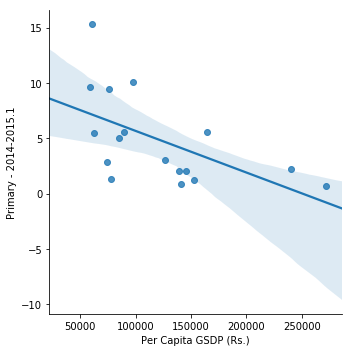

In [1264]:
sns.lmplot(x='Per Capita GSDP (Rs.)', y='Primary - 2014-2015.1', data=DS_DROP )

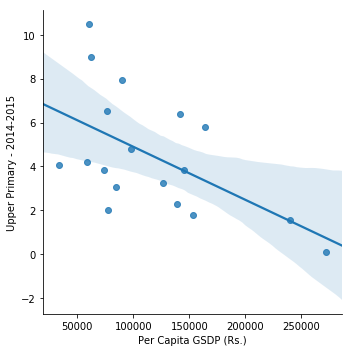

In [1265]:
sns.lmplot(x='Per Capita GSDP (Rs.)', y='Upper Primary - 2014-2015', data=DS_DROP)


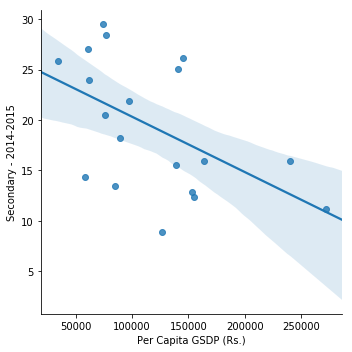

In [1266]:
sns.lmplot(x='Per Capita GSDP (Rs.)', y='Secondary - 2014-2015', data=DS_DROP)


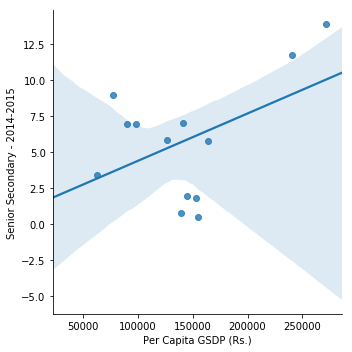

In [1267]:
sns.lmplot(x='Per Capita GSDP (Rs.)', y='Senior Secondary - 2014-2015', data=DS_DROP)

##  SubTask 2B.1: 
###    Analyse if there is any correlation of GDP per capita with dropout rates in education 
###    (primary, upper primary and secondary) for the year 2014-2015 for the states based on Above Plots   

####  From the above plots we can make out the below observation
####  primary : As the Drop out rate decrease, per capita GSDP increases
####  upper primary :  As the Drop out rate decrease, per capita GSDP increases
####  secondary: As the Drop out rate decrease, per capita GSDP increases
####  Senior Secondary: As the Drop out rate increases, per capita GSDP increases, this looks different from above graph

## SubTask 2B.2 :
###    Write the key insights you observe from this data,Form at least one reasonable hypothesis for the observations from the data
####    Ans : As the drop out rates are decreasing , per capita GSDP is increasing upto Secondary level of Education
####              This clearling indicates that Education level directly contribute to the high per capita GSDP of the states.if the 
####              population of the state is educated, they will be better able to contribute more to the progress of state 
####              Whatever is the Education level(primary, upper primary and secondary), it will definitely improve GSDP 
####              even if the population is atleast educated upto primary level, that will also contribute to GSDP.

####              There is an exception for the Senior secondary, As the dropout rate increases, GSDP per capita decrease